## Team 1
Marcos Melgar, Staniślaw Morawski, Pau Torras,

In [49]:
import cv2
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm.auto import tqdm

### Extracting features and building the various data structures

All of the features for downstream processing are computed here, and loaded whenever needed.

In [50]:
train_images_filenames = pickle.load(open('train_images_filenames.dat','rb'))
test_images_filenames = pickle.load(open('test_images_filenames.dat','rb'))
train_images_filenames = ['..' + n[15:] for n in train_images_filenames]
test_images_filenames  = ['..' + n[15:] for n in test_images_filenames]
train_labels = pickle.load(open('train_labels.dat','rb'))
test_labels = pickle.load(open('test_labels.dat','rb'))

In [12]:
# train_images_filenames = train_images_filenames[:1]
# train_labels = train_labels[:1]

In [51]:
# Precompute Dense SIFT Features for all images

sift = cv2.SIFT_create(nOctaveLayers=3)
train_dense_features = {}
train_dense_labels = {}
train_dense_keypoints = {}

# Training first
for filename, labels in zip(tqdm(train_images_filenames, desc="Computing training"), train_labels):
    ima = cv2.imread(filename)
    gray = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
    step_size = 8
    kp_o1 = [cv2.KeyPoint(x, y, step_size, octave=0) 
                for y in range(step_size // 2, gray.shape[0], step_size) 
                for x in range(step_size // 2, gray.shape[1], step_size)]
    kp_o2 = [cv2.KeyPoint(x, y, step_size, octave=1) 
                for y in range(step_size     , gray.shape[0], step_size * 2) 
                for x in range(step_size     , gray.shape[1], step_size * 2)]
    kp_o3 = [cv2.KeyPoint(x, y, step_size, octave=2) 
                for y in range(step_size * 2 , gray.shape[0], step_size * 4) 
                for x in range(step_size * 2 , gray.shape[1], step_size * 4)]
    kp = kp_o1 + kp_o2 + kp_o3
    kp, features = sift.compute(gray, kp)

    train_dense_features[filename.split('/')[-1]] = features
    train_dense_labels[filename.split('/')[-1]] = labels
    train_dense_keypoints[filename.split('/')[-1]] = [ii.pt for ii in kp]

np.savez("./train_dense_features", **train_dense_features)
with open("./train_dense_labels.pkl", 'wb') as f_label:
    pickle.dump(train_dense_labels, f_label)
with open("./train_dense_keypoints.pkl", 'wb') as f_kp:
    pickle.dump(train_dense_keypoints, f_kp)

train_dense_features = None; train_dense_keypoints = None

test_dense_features = {}
test_dense_labels = {}
test_dense_keypoints = {}

# Test afterward
for filename, labels in zip(tqdm(test_images_filenames, desc="And test"), test_labels):
    ima = cv2.imread(filename)
    gray = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
    step_size = 8
    kp_o1 = [cv2.KeyPoint(x, y, step_size, octave=0) 
                for y in range(step_size // 2, gray.shape[0], step_size) 
                for x in range(step_size // 2, gray.shape[1], step_size)]
    kp_o2 = [cv2.KeyPoint(x, y, step_size, octave=1) 
                for y in range(step_size     , gray.shape[0], step_size * 2) 
                for x in range(step_size     , gray.shape[1], step_size * 2)]
    kp_o3 = [cv2.KeyPoint(x, y, step_size, octave=2) 
                for y in range(step_size * 2 , gray.shape[0], step_size * 4) 
                for x in range(step_size * 2 , gray.shape[1], step_size * 4)]
    kp = kp_o1 + kp_o2 + kp_o3
    kp, features = sift.compute(gray, kp)

    test_dense_features[filename.split('/')[-1]] = features
    test_dense_labels[filename.split('/')[-1]] = labels
    test_dense_keypoints[filename.split('/')[-1]] = [ii.pt for ii in kp]

np.savez("./test_dense_features", **test_dense_features)
with open("./test_dense_labels.pkl", 'wb') as f_label:
    pickle.dump(test_dense_labels, f_label)
with open("./test_dense_keypoints.pkl", 'wb') as f_kp:
    pickle.dump(test_dense_keypoints, f_kp)

test_dense_features = None; test_dense_keypoints = None

And test: 100%|██████████| 807/807 [00:07<00:00, 101.85it/s]


In [14]:
sift = cv2.SIFT_create(nOctaveLayers=3)
train_sift_features = {}
train_sift_labels = {}
train_sift_keypoints = {}

# Training first
for filename, labels in zip(train_images_filenames, train_labels):
    ima = cv2.imread(filename)
    gray = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
    kp, features = sift.detectAndCompute(gray, None)

    train_sift_features[filename.split('/')[-1]] = features
    train_sift_labels[filename.split('/')[-1]] = labels
    train_sift_keypoints[filename.split('/')[-1]] = [ii.pt for ii in kp]

np.savez("./train_sift_features", **train_sift_features)
with open("./train_sift_labels.pkl", 'wb') as f_label:
    pickle.dump(train_sift_labels, f_label)
with open("./train_sift_keypoints.pkl", 'wb') as f_kp:
    pickle.dump(train_sift_keypoints, f_kp)

train_sift_features = None

test_sift_features = {}
test_sift_labels = {}
test_sift_keypoints = {}

# Test afterward
for filename, labels in zip(test_images_filenames, test_labels):
    ima = cv2.imread(filename)
    gray = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
    kp, features = sift.detectAndCompute(gray, None)

    test_sift_features[filename.split('/')[-1]] = features
    test_sift_labels[filename.split('/')[-1]] = labels
    test_sift_keypoints[filename.split('/')[-1]] = [ii.pt for ii in kp]

np.savez("./test_sift_features", **test_sift_features)
with open("./test_sift_labels.pkl", 'wb') as f_label:
    pickle.dump(test_sift_labels, f_label)
with open("./test_sift_keypoints.pkl", 'wb') as f_kp:
    pickle.dump(test_sift_keypoints, f_kp)

test_sift_features = None

Dense SIFT features are loaded and prepared to be processed

In [21]:
train_features = np.load("./train_dense_features.npz")
with open("./train_dense_labels.pkl", 'rb') as f_labels:
    train_labels = pickle.load(f_labels)
with open("./train_dense_keypoints.pkl", 'rb') as f_kp:
    train_keypoints = pickle.load(f_kp)

In [22]:
t_features = []
t_labels = []
t_keypoints = []
t_labels
for file in train_features.files:
    t_features.append(train_features[file])
    t_labels.append(train_labels[file])
    t_keypoints.append(train_keypoints[file])

D = np.vstack(t_features)

In [23]:
k = 256
codebook = MiniBatchKMeans(n_clusters=k, verbose=False, batch_size=k * 20,compute_labels=False,reassignment_ratio=10**-4,random_state=42)
codebook.fit(D)

MiniBatchKMeans(batch_size=5120, compute_labels=False, n_clusters=256,
                random_state=42, reassignment_ratio=0.0001, verbose=False)

In [24]:
visual_words=np.zeros((len(t_features),k),dtype=np.float32)
for i in range(len(t_features)):
    words=codebook.predict(t_features[i])
    visual_words[i,:]=np.bincount(words,minlength=k)

### The Codebook Dictionary Distribution

We want to have a visual confirmation that there are no superfluous words (which appear way too little to even consider them)

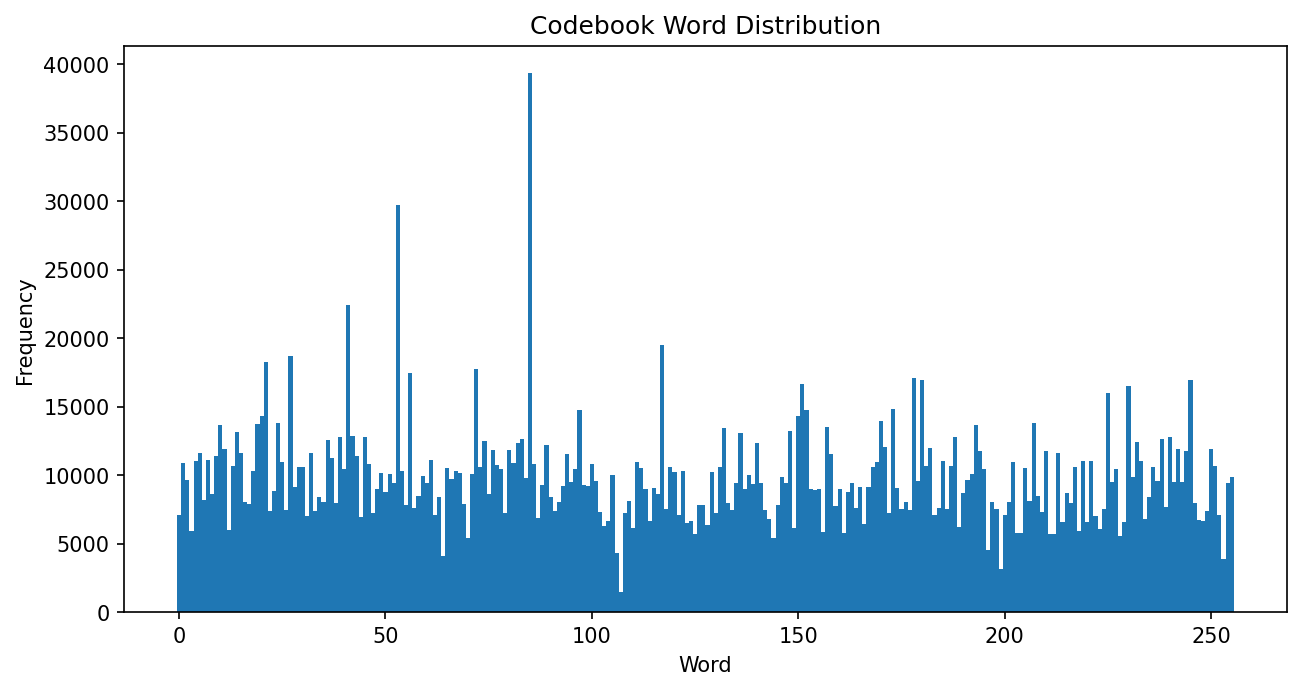

In [19]:
visual_dict = visual_words.sum(axis=0)

plt.figure(dpi=150, figsize=(10, 5))
plt.title("Codebook Word Distribution")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar(
    x=np.arange(len(visual_dict)),
    height=visual_dict,
    width=1)
plt.show()
plt.close()

Indeed, with a codebook of size 256, it appears the generated dictionary has somewhat of a uniform distribution (there is an outlier around word 50-60).

Since we did not do this last week, let's also check other values of k.

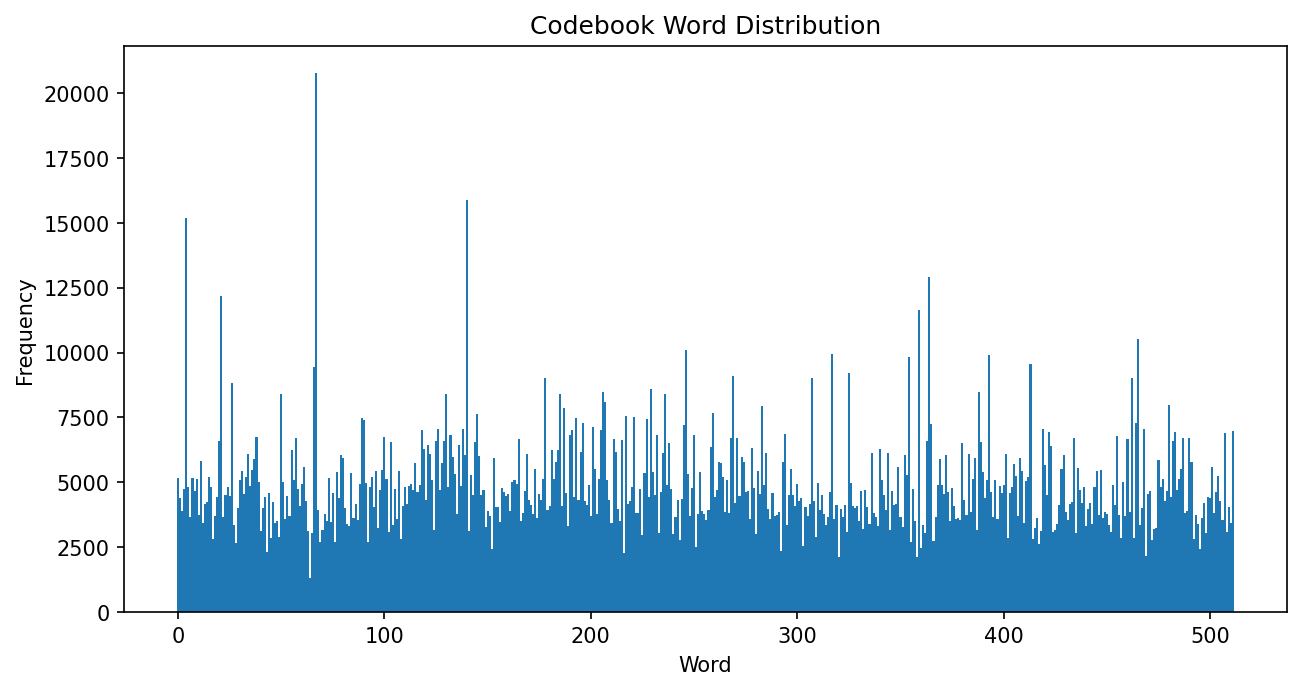

In [20]:
k = 512
codebook_512 = MiniBatchKMeans(n_clusters=k, verbose=False, batch_size=k * 20,compute_labels=False,reassignment_ratio=10**-4,random_state=42)
codebook_512.fit(D)

visual_words_512=np.zeros((len(t_features),k),dtype=np.float32)
for i in range(len(t_features)):
    words=codebook_512.predict(t_features[i])
    visual_words_512[i,:]=np.bincount(words,minlength=k)

visual_dict = visual_words_512.sum(axis=0)

plt.figure(dpi=150, figsize=(10, 5))
plt.title("Codebook Word Distribution")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar(
    x=np.arange(len(visual_dict)),
    height=visual_dict,
    width=1)
plt.show()
plt.close()

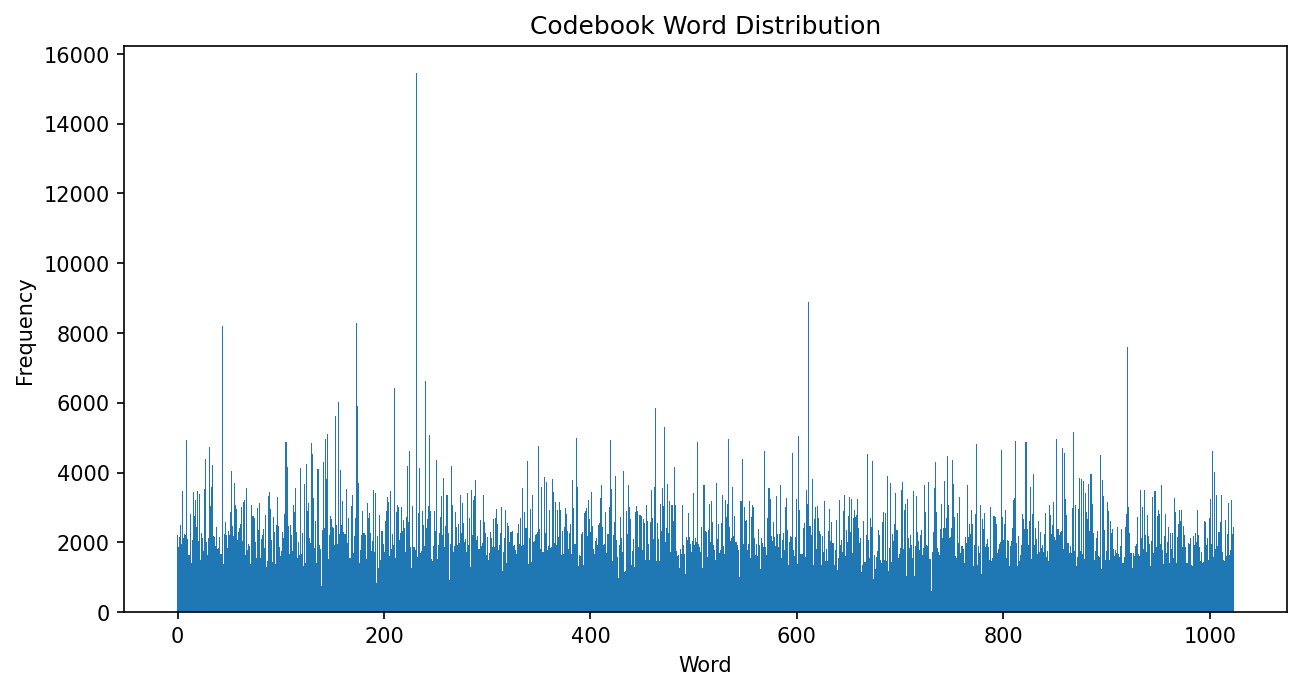

In [21]:
k = 1024
codebook_1024 = MiniBatchKMeans(n_clusters=k, verbose=False, batch_size=k * 20,compute_labels=False,reassignment_ratio=10**-4,random_state=42)
codebook_1024.fit(D)

visual_words_1024=np.zeros((len(t_features),k),dtype=np.float32)
for i in range(len(t_features)):
    words=codebook_1024.predict(t_features[i])
    visual_words_1024[i,:]=np.bincount(words,minlength=k)

visual_dict = visual_words_1024.sum(axis=0)

plt.figure(dpi=150, figsize=(10, 5))
plt.title("Codebook Word Distribution")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar(
    x=np.arange(len(visual_dict)),
    height=visual_dict,
    width=1)
plt.show()
plt.close()

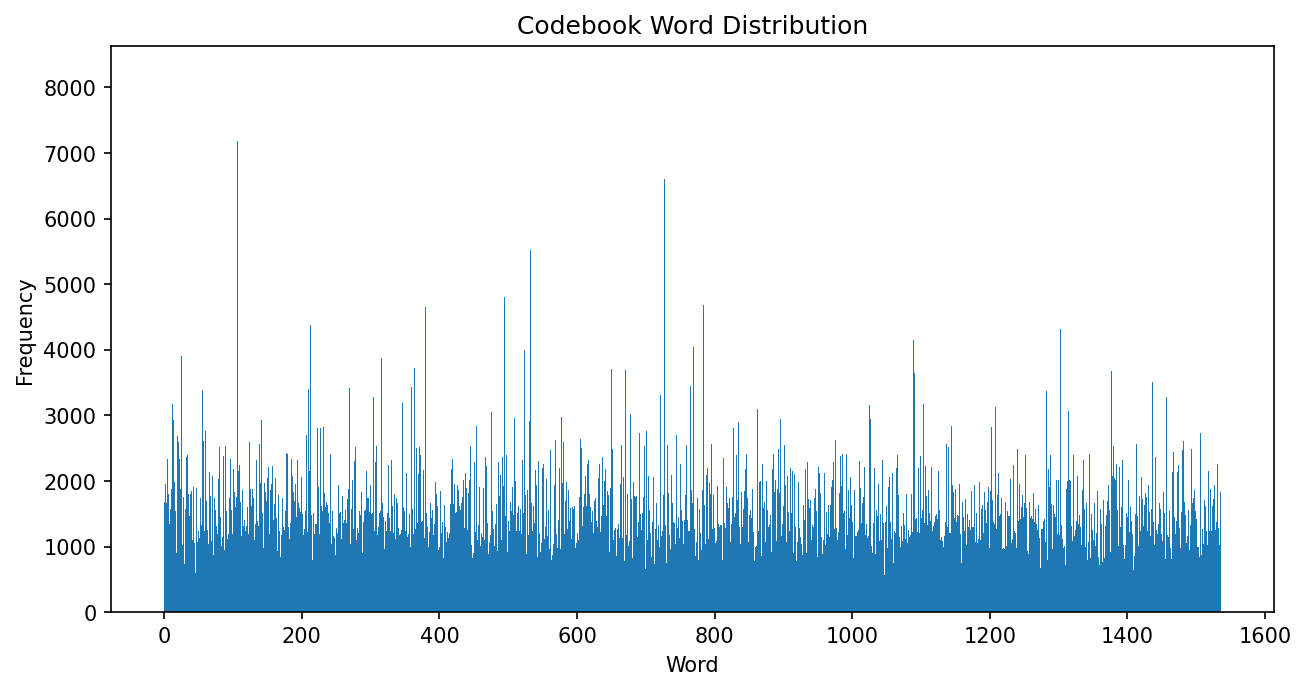

In [22]:
k = 1536
codebook_1536 = MiniBatchKMeans(n_clusters=k, verbose=False, batch_size=k * 20,compute_labels=False,reassignment_ratio=10**-4,random_state=42)
codebook_1536.fit(D)

visual_words_1536=np.zeros((len(t_features),k),dtype=np.float32)
for i in range(len(t_features)):
    words=codebook_1536.predict(t_features[i])
    visual_words_1536[i,:]=np.bincount(words,minlength=k)

visual_dict = visual_words_1536.sum(axis=0)

plt.figure(dpi=150, figsize=(10, 5))
plt.title("Codebook Word Distribution")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar(
    x=np.arange(len(visual_dict)),
    height=visual_dict,
    width=1)
plt.show()
plt.close()

### Searching the parameter space

A ```RandomizedSearchCV``` object is created to iterate over the parameter space randomly in order to obtain the a sizeable sample of best performing models. In this case, three parameters are being studied:
- The **kernel** employed for the *kernel trick*: linear, poly(nomial), rbf, sigmoid.
- The **degree** of the polynomial kernel (if chosen). We picked a conservative number for the sake of computational complexity.
- The regularisation constant **C**.

The latter is sampled from a normal distribution $N(0.5, 0.1)$, which should be bounded roughly in the $[0.2, 0.8]$ interval

#### Remarks

- The rbf kernel is $K(\textbf{x}, \textbf{x}') = \exp \left( - \frac{|| \textbf{x} - \textbf{x}' ||^2}{2 \sigma^2} \right)$
- SVM Performs normalisation **implicitly**

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import norm

def histogramIntersection(M,N):
  
  kernel = np.zeros((M.shape[0], N.shape[0]))

  for d in range(M.shape[1]):

    column_1 = M[:, d].reshape(-1, 1)
    column_2 = N[:, d].reshape(-1, 1)
    kernel += np.minimum(column_1, column_2.T)
    
  return kernel

param_dists = {
    "C": norm(loc= 0.5, scale=0.1),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid', histogramIntersection],
    "degree": [3, 7, 10],
}

svm = SVC()
svm_search = RandomizedSearchCV(
    estimator=svm, 
    param_distributions=param_dists, 
    n_iter=1000, 
    random_state=5, 
    cv=5, 
    verbose=10,
    n_jobs=-1
)
svm_search.fit(visual_words, t_labels)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5; 1/1000] START C=0.5441227486885042, degree=10, kernel=linear...........
[CV 1/5; 1/1000] END C=0.5441227486885042, degree=10, kernel=linear;, score=0.763 total time=   0.1s
[CV 2/5; 3/1000] START C=0.48002934689891724, degree=3, kernel=linear...........
[CV 2/5; 3/1000] END C=0.48002934689891724, degree=3, kernel=linear;, score=0.769 total time=   0.3s
[CV 2/5; 4/1000] START C=0.420673324933056, degree=3, kernel=poly...............
[CV 4/5; 2/1000] START C=0.46691298481059124, degree=7, kernel=linear...........
[CV 1/5; 2/1000] START C=0.46691298481059124, degree=7, kernel=linear...........
[CV 5/5; 2/1000] START C=0.46691298481059124, degree=7, kernel=linear...........
[CV 1/5; 3/1000] START C=0.48002934689891724, degree=3, kernel=linear...........
[CV 4/5; 3/1000] START C=0.48002934689891724, degree=3, kernel=linear...........
[CV 5/5; 1/1000] START C=0.5441227486885042, degree=10, kernel=linear...........
[CV 

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=1000, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f09c413ac70>,
                                        'degree': [3, 7, 10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid',
                                                   <function histogramIntersection at 0x7f09c4474b80>]},
                   random_state=5, verbose=10)

In [37]:
train_results = pd.DataFrame(svm_search.cv_results_)
train_results = train_results.sort_values("rank_test_score")

train_results.to_csv("./train_results/train1_default_tolerance_d8.csv")
train_results[:20]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
465,16.446842,0.964608,4.618668,0.478760,0.525688,3,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.5256879301733368, 'degree': 3, 'kernel...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
165,16.773806,0.522967,4.316253,0.500160,0.490752,7,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.49075213382451754, 'degree': 7, 'kerne...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
166,16.664238,0.755323,4.424493,0.335210,0.414313,3,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.4143131851679971, 'degree': 3, 'kernel...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
806,18.273904,1.504338,4.617765,0.417956,0.528896,10,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.5288961629372505, 'degree': 10, 'kerne...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
170,16.794708,0.610402,4.072226,0.321350,0.581719,3,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.5817193468016706, 'degree': 3, 'kernel...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
171,16.379120,0.171515,4.046769,0.258882,0.428907,7,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.42890691700422573, 'degree': 7, 'kerne...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
566,17.973048,0.829095,4.199436,0.392867,0.557096,10,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.557095625261152, 'degree': 10, 'kernel...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
797,17.567445,2.149712,4.965095,0.532383,0.44486,7,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.4448599053143335, 'degree': 7, 'kernel...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
795,17.970111,0.890908,5.033013,0.592873,0.413326,3,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.4133257112366368, 'degree': 3, 'kernel...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1
177,15.467683,0.265026,4.158515,0.334278,0.669849,3,<function histogramIntersection at 0x7f09c4474...,"{'C': 0.6698492304234144, 'degree': 3, 'kernel...",0.808511,0.835106,0.835106,0.888298,0.832447,0.839894,0.026188,1


### Test results

Once the validation scores for each of the models are obtained, test scores are computed using the best models. We picked the 20 best performing ones.

Before digging any deeper on other considerations, we want to assess whether any of these classifiers is overfitting or not.

In [38]:
test_features = np.load("./test_dense_features.npz")
with open("./test_dense_labels.pkl", 'rb') as f_labels:
    test_labels = pickle.load(f_labels)
with open("./test_dense_keypoints.pkl", 'rb') as f_kp:
    test_keypoints = pickle.load(f_kp)

ts_features = []
ts_labels = []
ts_keypoints = []

for file in test_features.files:
    ts_features.append(test_features[file])
    ts_labels.append(test_labels[file])
    ts_keypoints.append(test_keypoints[file])

In [39]:
visual_words_test=np.zeros((len(ts_features),k),dtype=np.float32)
for i in range(len(ts_features)):
    des=ts_features[i]
    words=codebook.predict(des)
    visual_words_test[i,:]=np.bincount(words,minlength=k)

In [29]:
test_results = pd.DataFrame().reindex(columns=["param_C", "param_degree", "param_kernel", "test_score"])

for _, s in train_results[:20][["param_C", "param_degree", "param_kernel", "mean_test_score"]].T.iteritems():

    svc_test = SVC(C=s["param_C"], kernel=s["param_kernel"], degree=s["param_degree"])
    svc_test.fit(visual_words, t_labels)

    test_acc = 100*svc_test.score(visual_words_test, ts_labels)
    test_results = test_results.append({
        "param_C": s["param_C"],
        "param_degree": s["param_degree"],
        "param_kernel": s["param_kernel"],
        "test_score": test_acc,
    }, ignore_index=True)
test_results.to_csv("./test_results/test1_default_tolerance_d8.csv")
test_results

,param_C,param_degree,param_kernel,test_score
0,0.525688,3.0,<function histogramIntersection at 0x7f09c4474...,87.732342
1,0.490752,7.0,<function histogramIntersection at 0x7f09c4474...,87.732342
2,0.414313,3.0,<function histogramIntersection at 0x7f09c4474...,87.732342
3,0.528896,10.0,<function histogramIntersection at 0x7f09c4474...,87.732342
4,0.581719,3.0,<function histogramIntersection at 0x7f09c4474...,87.732342
5,0.428907,7.0,<function histogramIntersection at 0x7f09c4474...,87.732342
6,0.557096,10.0,<function histogramIntersection at 0x7f09c4474...,87.732342
7,0.444860,7.0,<function histogramIntersection at 0x7f09c4474...,87.732342
8,0.413326,3.0,<function histogramIntersection at 0x7f09c4474...,87.732342
9,0.669849,3.0,<function histogramIntersection at 0x7f09c4474...,87.732342


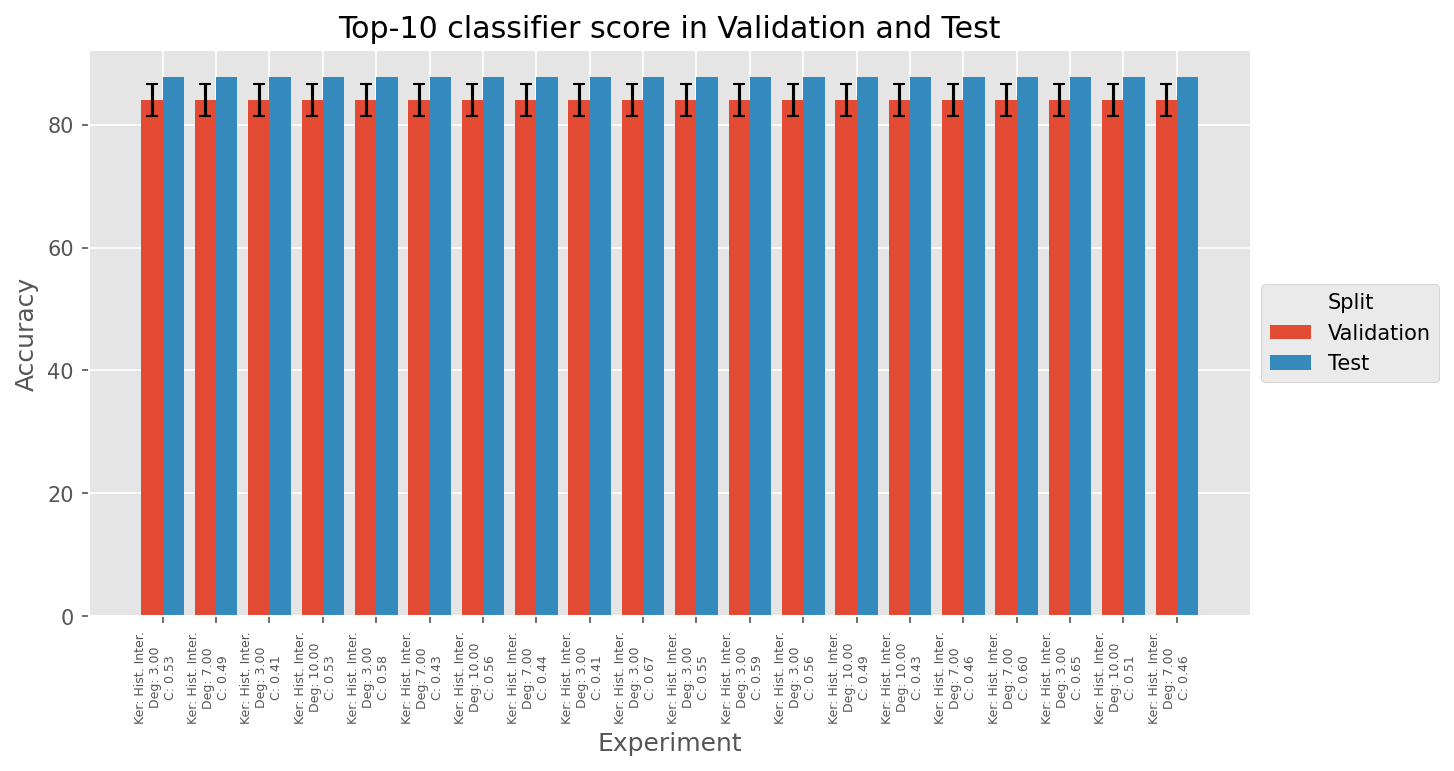

In [40]:
best_train = train_results[:20]

kernames = {
    "poly": "Polynomial",
    'linear': "Linear",
    'rbf': "RBF", 
    'sigmoid': "Sigmoid", 
    histogramIntersection: "Hist. Inter.",
}

plt.figure(dpi=150, figsize=(10, 5))
plt.style.use("ggplot")
plt.title("Top-20 classifier score in Validation and Test")
plt.xlabel("Experiment")
plt.ylabel("Accuracy")
plt.bar(
    np.arange(1, 21, 1) - 0.7,
    height=best_train["mean_test_score"].to_numpy()*100,
    yerr=best_train["std_test_score"].to_numpy()*100,
    width= 0.4,
    label="Validation",
    ecolor='black', 
    capsize=3
)
plt.bar(
    np.arange(1, 21, 1) - 0.3,
    height=test_results["test_score"].to_numpy(),
    width= 0.4,
    label="Test"
)
plt.xticks(
    ticks=np.arange(0.5, 20, 1),
    labels=[f"Ker: {kernames[best_train['param_kernel'].iloc[ii]]}\nDeg: {best_train['param_degree'].iloc[ii]:.2f}\nC: {best_train['param_C'].iloc[ii]:.2f}\n" for ii in range(len(best_train))],
    fontsize=6,
    rotation=90,
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Split")
plt.show()
plt.close()

### What is going on with Polynomial Kernel Classifiers?

Polynomial kernel SVM's are acting in a very peculiar way, which we deem worthy of further analysis. There was certainly some heavy overfitting going on with them when using a grid of points with higher density, which seemed to be quite present even on low degree polynomials. However, as will be shown now, this disappears by using sparser points.

In [31]:
poly_table = train_results.loc[train_results["param_kernel"] == "poly"]
poly_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
917,0.498974,0.072356,0.194003,0.102686,0.73004,3,poly,"{'C': 0.7300404538872559, 'degree': 3, 'kernel...",0.781915,0.816489,0.789894,0.805851,0.768617,0.792553,0.016988,573
857,0.382132,0.061393,0.128886,0.052677,0.722941,3,poly,"{'C': 0.7229413863193503, 'degree': 3, 'kernel...",0.781915,0.816489,0.787234,0.805851,0.768617,0.792021,0.017104,577
75,0.299771,0.039503,0.120557,0.061799,0.716091,3,poly,"{'C': 0.7160912916538443, 'degree': 3, 'kernel...",0.781915,0.813830,0.789894,0.805851,0.768617,0.792021,0.016256,577
781,0.427449,0.129330,0.127991,0.085010,0.711687,3,poly,"{'C': 0.7116873249579327, 'degree': 3, 'kernel...",0.781915,0.813830,0.789894,0.805851,0.765957,0.791489,0.017038,584
573,0.351840,0.017338,0.232184,0.157326,0.671165,3,poly,"{'C': 0.6711646175450668, 'degree': 3, 'kernel...",0.779255,0.805851,0.781915,0.808511,0.765957,0.788298,0.016360,591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.637524,0.061332,0.809315,0.034523,0.328147,10,poly,"{'C': 0.32814700524241586, 'degree': 10, 'kern...",0.244681,0.359043,0.236702,0.257979,0.226064,0.264894,0.048214,996
925,0.585275,0.085356,0.935032,0.298345,0.336044,10,poly,"{'C': 0.33604389384499356, 'degree': 10, 'kern...",0.244681,0.361702,0.234043,0.260638,0.220745,0.264362,0.050395,997
615,0.723444,0.136877,0.618725,0.338084,0.372035,10,poly,"{'C': 0.3720352380478166, 'degree': 10, 'kerne...",0.247340,0.359043,0.234043,0.260638,0.204787,0.261170,0.052317,998
39,0.564367,0.074109,0.136633,0.007009,0.364782,10,poly,"{'C': 0.36478191883902955, 'degree': 10, 'kern...",0.247340,0.356383,0.234043,0.260638,0.207447,0.261170,0.050753,999


In [32]:
test_results_poly = pd.DataFrame().reindex(columns=["param_C", "param_degree", "param_kernel", "test_score"])

for _, s in train_results.loc[train_results["param_kernel"] == "poly"][["param_C", "param_degree", "param_kernel", "mean_test_score"]].T.iteritems():

    svc_test = SVC(C=s["param_C"], kernel=s["param_kernel"], degree=s["param_degree"])
    svc_test.fit(visual_words, t_labels)

    test_acc = 100*svc_test.score(visual_words_test, ts_labels)
    test_results_poly = test_results_poly.append({
        "param_C": s["param_C"],
        "param_degree": s["param_degree"],
        "param_kernel": s["param_kernel"],
        "test_score": test_acc,
    }, ignore_index=True)
test_results_poly

,param_C,param_degree,param_kernel,test_score
0,0.730040,3.0,poly,82.403965
1,0.722941,3.0,poly,82.403965
2,0.716091,3.0,poly,82.527881
3,0.711687,3.0,poly,82.527881
4,0.671165,3.0,poly,82.280050
...,...,...,...,...
197,0.328147,10.0,poly,32.837670
198,0.336044,10.0,poly,31.226766
199,0.372035,10.0,poly,28.996283
200,0.364782,10.0,poly,29.120198


In [33]:
best_train_poly = train_results.sort_values("rank_test_score")
best_train_poly = best_train_poly.loc[best_train_poly["param_kernel"] == "poly"]
best_train_poly = best_train_poly[:20]
best_train_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
917,0.498974,0.072356,0.194003,0.102686,0.73004,3,poly,"{'C': 0.7300404538872559, 'degree': 3, 'kernel...",0.781915,0.816489,0.789894,0.805851,0.768617,0.792553,0.016988,573
857,0.382132,0.061393,0.128886,0.052677,0.722941,3,poly,"{'C': 0.7229413863193503, 'degree': 3, 'kernel...",0.781915,0.816489,0.787234,0.805851,0.768617,0.792021,0.017104,577
75,0.299771,0.039503,0.120557,0.061799,0.716091,3,poly,"{'C': 0.7160912916538443, 'degree': 3, 'kernel...",0.781915,0.813830,0.789894,0.805851,0.768617,0.792021,0.016256,577
781,0.427449,0.129330,0.127991,0.085010,0.711687,3,poly,"{'C': 0.7116873249579327, 'degree': 3, 'kernel...",0.781915,0.813830,0.789894,0.805851,0.765957,0.791489,0.017038,584
573,0.351840,0.017338,0.232184,0.157326,0.671165,3,poly,"{'C': 0.6711646175450668, 'degree': 3, 'kernel...",0.779255,0.805851,0.781915,0.808511,0.765957,0.788298,0.016360,591
330,0.305409,0.036717,0.133911,0.051822,0.65462,3,poly,"{'C': 0.654619737866875, 'degree': 3, 'kernel'...",0.776596,0.805851,0.781915,0.805851,0.768617,0.787766,0.015361,592
174,0.330123,0.051954,0.257931,0.254256,0.645498,3,poly,"{'C': 0.6454976827126486, 'degree': 3, 'kernel...",0.776596,0.805851,0.779255,0.805851,0.768617,0.787234,0.015599,595
636,0.465292,0.189152,0.211593,0.164986,0.634852,3,poly,"{'C': 0.6348522742037879, 'degree': 3, 'kernel...",0.776596,0.805851,0.776596,0.803191,0.768617,0.786170,0.015287,596
971,0.366240,0.029340,0.200186,0.051317,0.61386,3,poly,"{'C': 0.613860434856807, 'degree': 3, 'kernel'...",0.776596,0.803191,0.776596,0.803191,0.768617,0.785638,0.014625,597
823,0.394472,0.082556,0.163316,0.068473,0.613996,3,poly,"{'C': 0.6139957376141054, 'degree': 3, 'kernel...",0.776596,0.803191,0.776596,0.803191,0.768617,0.785638,0.014625,597


In [34]:
best_test_poly = pd.DataFrame().reindex(columns=["param_C", "param_degree", "param_kernel", "test_score"])

for _, s in best_train_poly.loc[best_train_poly["param_kernel"] == "poly"][["param_C", "param_degree", "param_kernel", "mean_test_score"]].T.iteritems():
    best_test_poly = best_test_poly.append({
        "param_C": s["param_C"],
        "param_degree": s["param_degree"],
        "param_kernel": s["param_kernel"],
        "test_score": test_results_poly.query("param_C == @s['param_C'] & param_degree == @s['param_degree'] & param_kernel == @s['param_kernel']").iloc[0]["test_score"],
    }, ignore_index=True)

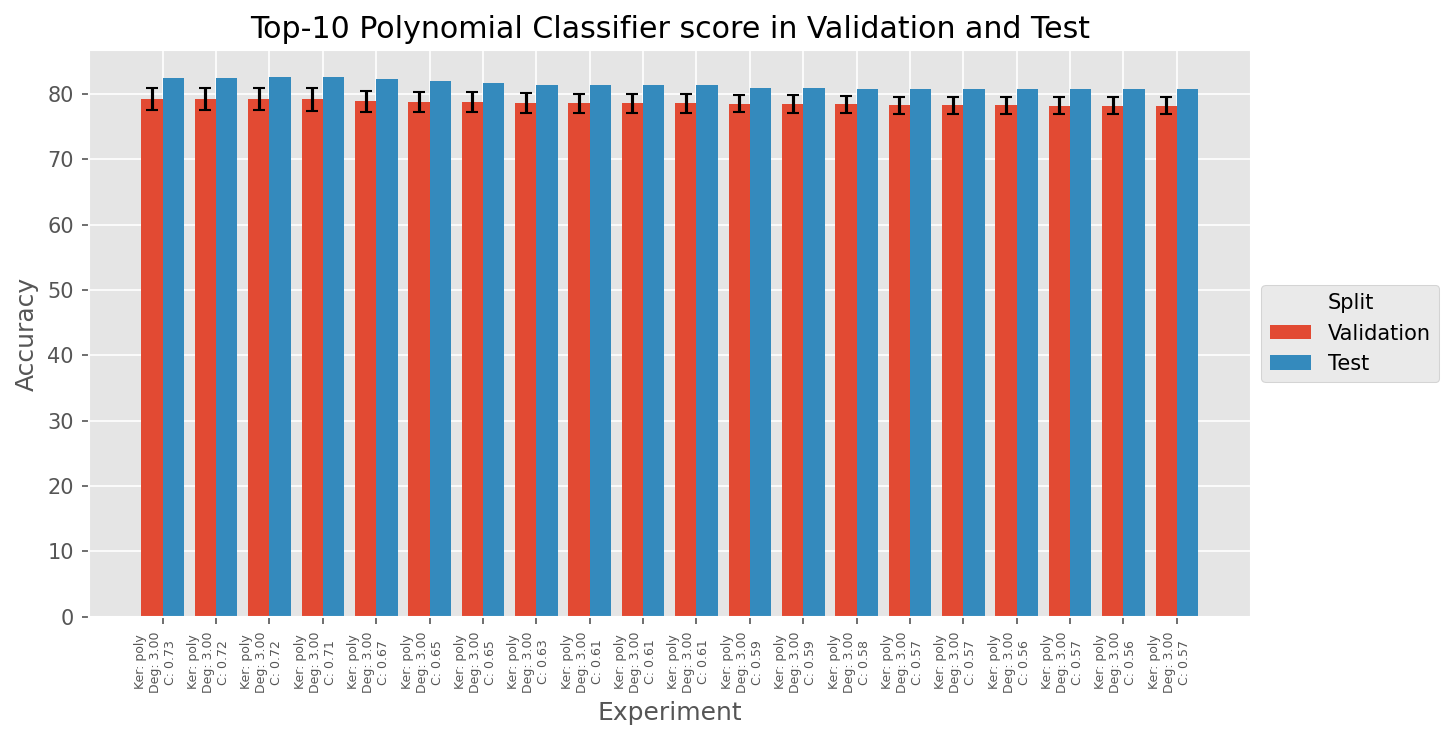

In [35]:
plt.figure(dpi=150, figsize=(10, 5))
plt.title("Top-20 Polynomial Classifier score in Validation and Test")
plt.xlabel("Experiment")
plt.ylabel("Accuracy")
plt.style.use("ggplot")
plt.bar(
    np.arange(1, 21, 1) - 0.7,
    height=best_train_poly["mean_test_score"].to_numpy()*100,
    yerr=best_train_poly["std_test_score"].to_numpy()*100,
    width= 0.4,
    label="Validation",
    ecolor='black', 
    capsize=3
)
plt.bar(
    np.arange(1, 21, 1) - 0.3,
    height=best_test_poly["test_score"].to_numpy(),
    width= 0.4,
    label="Test"
)
plt.xticks(
    ticks=np.arange(0.5, 20, 1),
    labels=[f"Ker: {best_train_poly['param_kernel'].iloc[ii]}\nDeg: {best_train_poly['param_degree'].iloc[ii]:.2f}\nC: {best_train_poly['param_C'].iloc[ii]:.2f}\n" for ii in range(len(best_train_poly))],
    fontsize=6,
    rotation=90,
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Split")
plt.show()
plt.close()

It should be noted higher degree polynomials don't quite perform well. This is probably due to overfitting.

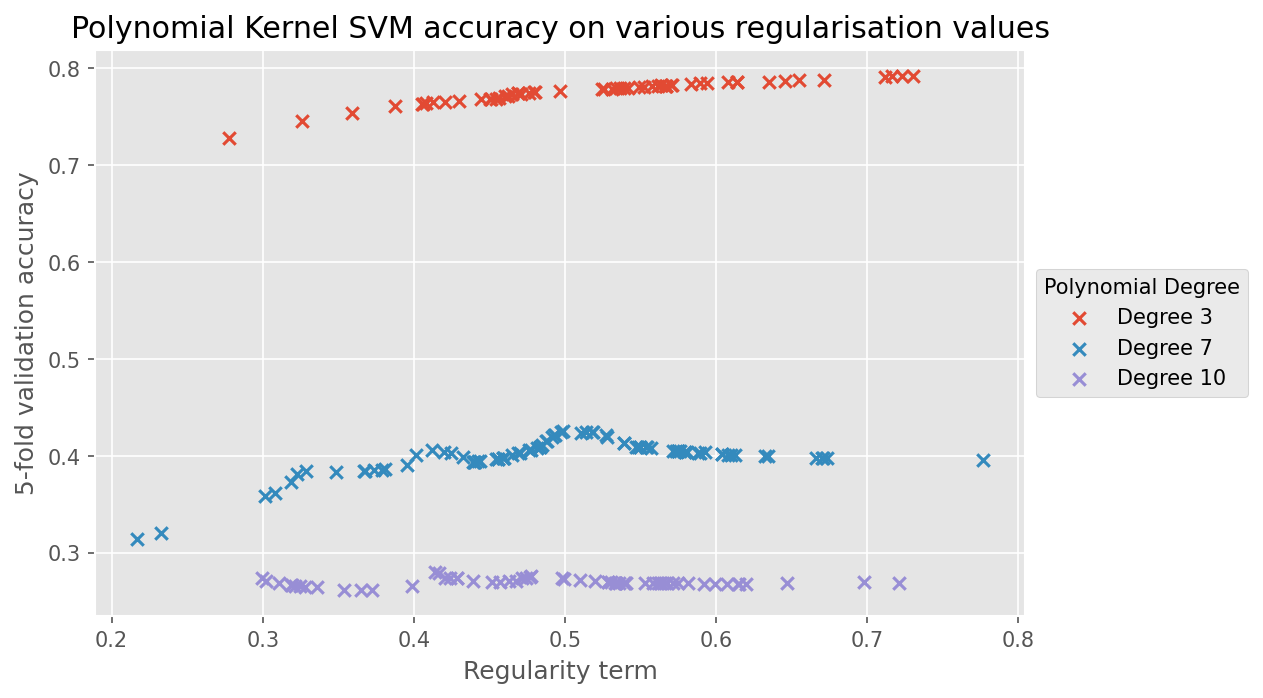

In [36]:
poly_classes = poly_table["param_degree"].to_numpy().astype(int)
poly_C = poly_table["param_C"].to_numpy()
poly_A = poly_table["mean_test_score"].to_numpy()

plt.figure(dpi=150, figsize=(8, 5))
plt.style.use("ggplot")
plt.title("Polynomial Kernel SVM accuracy on various regularisation values")
plt.xlabel("Regularity term")
plt.ylabel("5-fold validation accuracy")
plt.scatter(
    poly_C[poly_classes == 3],
    poly_A[poly_classes == 3],
    label="Degree 3",
    marker="x"
)
plt.scatter(
    poly_C[poly_classes == 7],
    poly_A[poly_classes == 7],
    label="Degree 7",
    marker="x"
)
plt.scatter(
    poly_C[poly_classes == 10],
    poly_A[poly_classes == 10],
    label="Degree 10",
    marker="x"
)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Polynomial Degree")
plt.show()
plt.close()

Dimensionality reduction, with PCA and LDA

We now want whether using dimensionality reduction improves results on the best performing configurations

In [19]:
train_results = pd.read_csv("./train_results/train1_default_tolerance_d8.csv")[:20]

In [42]:
test_results_lda = pd.DataFrame().reindex(columns=["param_C", "param_degree", "param_kernel", "test_score"])

lda = LinearDiscriminantAnalysis(n_components=7)
VWlda = lda.fit_transform(visual_words, t_labels)

for _, s in train_results[:20][["param_C", "param_degree", "param_kernel", "mean_test_score"]].T.iteritems():
    svc_lda = SVC(C=s["param_C"], kernel=s["param_kernel"], degree=s["param_degree"])
    svc_lda.fit(VWlda, t_labels)

    test_acc_lda = 100*svc_lda.score(lda.transform(visual_words_test), ts_labels)
    test_results_lda = test_results_lda.append({
        "param_C": s["param_C"],
        "param_degree": s["param_degree"],
        "param_kernel": s["param_kernel"],
        "test_score": test_acc_lda,
    }, ignore_index=True)
test_results_lda

,param_C,param_degree,param_kernel,test_score
0,0.525688,3.0,<function histogramIntersection at 0x7f09c4474...,83.271375
1,0.490752,7.0,<function histogramIntersection at 0x7f09c4474...,83.023544
2,0.414313,3.0,<function histogramIntersection at 0x7f09c4474...,83.271375
3,0.528896,10.0,<function histogramIntersection at 0x7f09c4474...,83.271375
4,0.581719,3.0,<function histogramIntersection at 0x7f09c4474...,82.775713
5,0.428907,7.0,<function histogramIntersection at 0x7f09c4474...,83.271375
6,0.557096,10.0,<function histogramIntersection at 0x7f09c4474...,82.899628
7,0.444860,7.0,<function histogramIntersection at 0x7f09c4474...,83.395291
8,0.413326,3.0,<function histogramIntersection at 0x7f09c4474...,83.271375
9,0.669849,3.0,<function histogramIntersection at 0x7f09c4474...,82.156134


In [43]:
test_results_pca = pd.DataFrame().reindex(columns=["param_C", "param_degree", "param_kernel", "test_score"])

pca = PCA(n_components=64)
VWpca = pca.fit_transform(visual_words, t_labels)

for _, s in train_results[:20][["param_C", "param_degree", "param_kernel", "mean_test_score"]].T.iteritems():
    svc_pca = SVC(C=s["param_C"], kernel=s["param_kernel"], degree=s["param_degree"])
    svc_pca.fit(VWpca, t_labels)

    test_acc_pca = 100*svc_pca.score(pca.transform(visual_words_test), ts_labels)
    test_results_pca = test_results_pca.append({
        "param_C": s["param_C"],
        "param_degree": s["param_degree"],
        "param_kernel": s["param_kernel"],
        "test_score": test_acc_pca,
    }, ignore_index=True)
test_results_pca

,param_C,param_degree,param_kernel,test_score
0,0.525688,3.0,<function histogramIntersection at 0x7f09c4474...,82.651797
1,0.490752,7.0,<function histogramIntersection at 0x7f09c4474...,82.651797
2,0.414313,3.0,<function histogramIntersection at 0x7f09c4474...,82.651797
3,0.528896,10.0,<function histogramIntersection at 0x7f09c4474...,82.651797
4,0.581719,3.0,<function histogramIntersection at 0x7f09c4474...,82.651797
5,0.428907,7.0,<function histogramIntersection at 0x7f09c4474...,82.651797
6,0.557096,10.0,<function histogramIntersection at 0x7f09c4474...,82.651797
7,0.444860,7.0,<function histogramIntersection at 0x7f09c4474...,82.651797
8,0.413326,3.0,<function histogramIntersection at 0x7f09c4474...,82.651797
9,0.669849,3.0,<function histogramIntersection at 0x7f09c4474...,82.651797


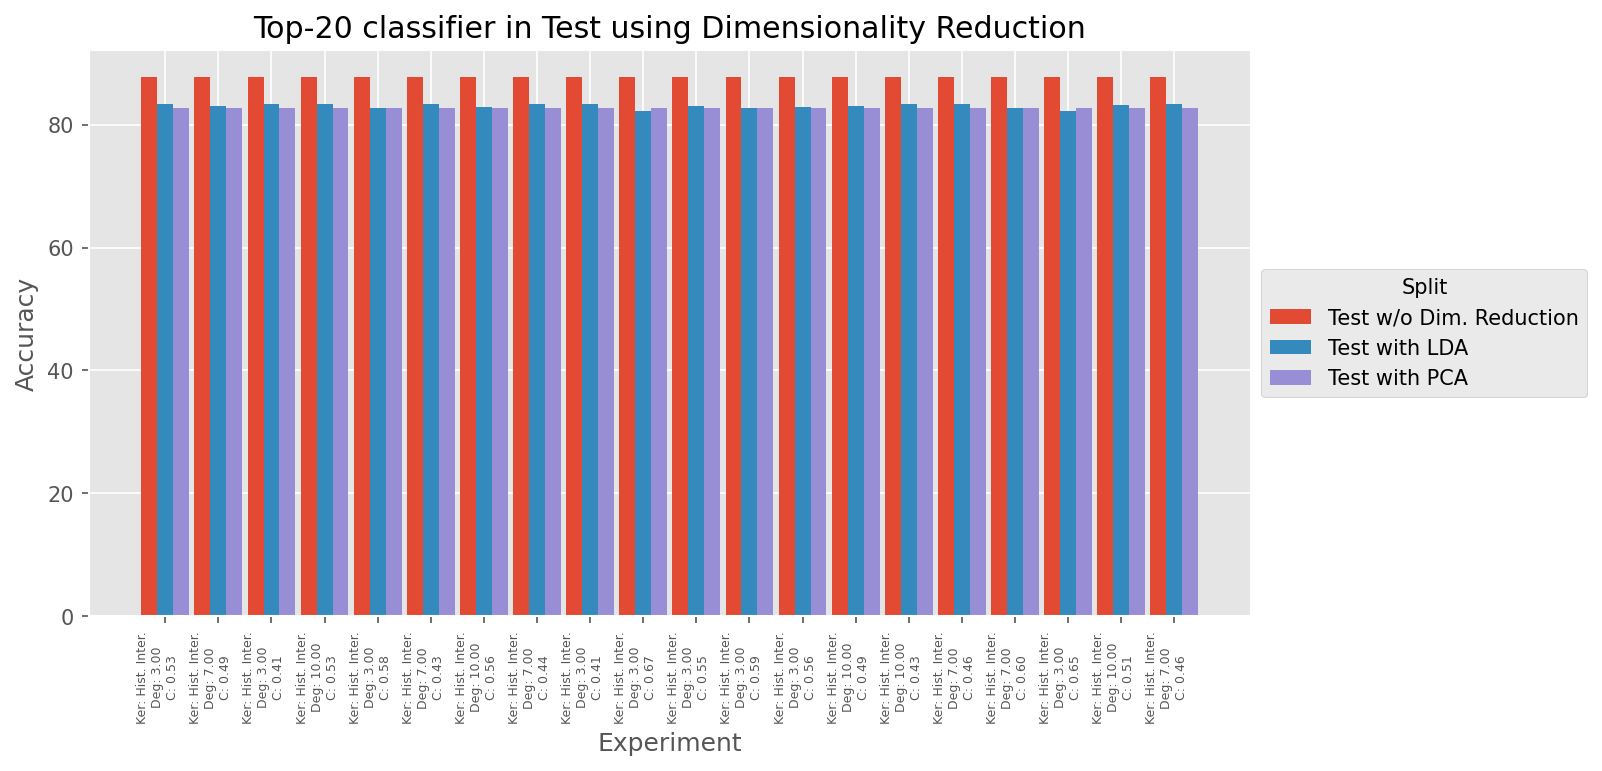

In [45]:
kernames = {
    "poly": "Polynomial",
    'linear': "Linear",
    'rbf': "RBF", 
    'sigmoid': "Sigmoid", 
    histogramIntersection: "Hist. Inter.",
}

plt.figure(dpi=150, figsize=(10, 5))
plt.style.use("ggplot")
plt.title("Top-20 classifier in Test using Dimensionality Reduction")
plt.xlabel("Experiment")
plt.ylabel("Accuracy")
plt.bar(
    np.arange(1, 21, 1) - 0.8,
    height=test_results["test_score"].to_numpy(),
    width= 0.3,
    label="Test w/o Dim. Reduction"
)
plt.bar(
    np.arange(1, 21, 1) - 0.5,
    height=test_results_lda["test_score"].to_numpy(),
    width= 0.3,
    label="Test with LDA"
)
plt.bar(
    np.arange(1, 21, 1) - 0.2,
    height=test_results_pca["test_score"].to_numpy(),
    width= 0.3,
    label="Test with PCA"
)
plt.xticks(
    ticks=np.arange(0.5, 20, 1),
    labels=[f"Ker: {kernames[best_train['param_kernel'].iloc[ii]]}\nDeg: {best_train['param_degree'].iloc[ii]:.2f}\nC: {best_train['param_C'].iloc[ii]:.2f}\n" for ii in range(len(best_train))],
    fontsize=6,
    rotation=90,
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Split")
plt.show()
plt.close()

Seems like this time around, using SVM and powerful kernels, neither type of dimensionality reducing technique seems to improve results. However, it must be noted that computation times decrease dramatically in the case of LDA, whereas in PCA they half (we do not have specific data for each run aside from the cell running time).

# Spatial Pyramid 

In [52]:
import cv2
import numpy as np
import pickle
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm.auto import tqdm

In [53]:
train_features = np.load("./train_dense_features.npz")
with open("./train_dense_labels.pkl", 'rb') as f_labels:
    train_labels = pickle.load(f_labels)
with open("./train_dense_keypoints.pkl", 'rb') as f_kp:
    train_keypoints = pickle.load(f_kp)

In [41]:
t_features = []
t_labels = []
t_keypoints = []
t_labels
for file in train_features.files:
    t_features.append(train_features[file])
    t_labels.append(train_labels[file])
    t_keypoints.append(train_keypoints[file])

In [42]:
D = np.vstack(t_features)

k = 256
codebook = MiniBatchKMeans(n_clusters=k, verbose=False, batch_size=k * 20,compute_labels=False,reassignment_ratio=10**-4,random_state=42)
codebook.fit(D)

MiniBatchKMeans(batch_size=5120, compute_labels=False, n_clusters=256,
                random_state=42, reassignment_ratio=0.0001, verbose=False)

In [46]:
with open("./codebook/codebook_sp.pkl", 'wb') as f_cb:
    pickle.dump(codebook, f_cb)

In [3]:
from itertools import chain

n_levels = 3

t_features = []
t_labels = []
t_keypoints = []

level_features = []
for file in tqdm(train_features.files, desc="Computing spatial pyramids"):
    kp = np.asarray(train_keypoints[file])
    features = train_features[file]

    # Build a pyramid using kp coordinates and patience
    # Images are all 256 x 256 px, therefore a 4x4 grid
    # with 3 levels should work well.

    level_bins = []

    for level in range(n_levels):
        # Compute the grid; I've been struggling to write it
        # only with numpy, but with two loops it should work

        # With this build either a dictionary or separate lists
        # for each image and level;
        # list(list(ArrayLike))
        #  ^     ^      ^
        #  |     |      |
        #  +-----+------+----------> Index belonging to images
        #        |      |
        #        +------+----------> Index belonging to feature level
        #               |
        #               +----------> Feature array 
        # 
        # Maybe the D matrix should be done separately, as we
        # still care about the points in separate fashion for
        # codebook clustering (we only need the pyramid for
        # computing words and such)

        n_bins = 2 ** level
        keypoint_bin_coord = np.floor(kp / 256 * n_bins)
        keypoint_bin = keypoint_bin_coord[:, 0] * n_bins + keypoint_bin_coord[:, 1]
        features_binned = np.hstack((keypoint_bin[:, np.newaxis], features))
        features_binned = features_binned[features_binned[:, 0].argsort()]
        breakpts = np.unique(features_binned[:, 0], return_index=True)[1][1:]
        bins = np.split(features_binned[:, 1:], breakpts)
        level_bins.append(bins)
        
    t_labels.append(train_labels[file])
    t_keypoints.append(train_keypoints[file])
    all_levels = list(chain.from_iterable(level_bins))
    level_features.append(all_levels)

Computing spatial pyramids: 100%|██████████| 1880/1880 [00:08<00:00, 221.67it/s]


In [38]:
with open("./codebook/codebook_sp.pkl", "rb") as f_cb:
    codebook = pickle.load(f_cb)
k = 256

In [7]:
n_feature_bins = sum([2 ** (i * 2) for i in range(n_levels)])
visual_words=np.zeros((len(level_features), n_feature_bins, k), dtype=np.float32)

for i in tqdm(range(len(level_features))):
    for j in range(n_feature_bins):
        words=codebook.predict(level_features[i][j].astype(np.float32))
        visual_words[i,j,:] = np.bincount(words, minlength=k)

visual_words = visual_words.reshape(visual_words.shape[0], -1)
visual_words.shape

100%|██████████| 1880/1880 [15:00<00:00,  2.09it/s]


(1880, 5376)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import norm


def histogramIntersection(M,N):
  
  kernel = np.zeros((M.shape[0], N.shape[0]))

  for d in range(M.shape[1]):

    column_1 = M[:, d].reshape(-1, 1)
    column_2 = N[:, d].reshape(-1, 1)
    kernel += np.minimum(column_1, column_2.T)
    
  return kernel

param_dists = {
    "C": norm(loc= 0.5, scale=0.1),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid', histogramIntersection],
    "degree": [3, 7, 10],
}

svm = SVC()
svm_search = RandomizedSearchCV(
    estimator=svm, 
    param_distributions=param_dists, 
    n_iter=100, 
    random_state=5, 
    cv=5, 
    verbose=10,
    n_jobs=-1

)
svm_search.fit(visual_words, t_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5; 2/100] START C=0.46691298481059124, degree=7, kernel=linear............[CV 1/5; 2/100] START C=0.46691298481059124, degree=7, kernel=linear............[CV 4/5; 3/100] START C=0.48002934689891724, degree=3, kernel=linear............

[CV 3/5; 3/100] START C=0.48002934689891724, degree=3, kernel=linear............[CV 2/5; 1/100] START C=0.5441227486885042, degree=10, kernel=linear............[CV 4/5; 2/100] START C=0.46691298481059124, degree=7, kernel=linear............[CV 2/5; 3/100] START C=0.48002934689891724, degree=3, kernel=linear............



[CV 2/5; 2/100] START C=0.46691298481059124, degree=7, kernel=linear............[CV 3/5; 1/100] START C=0.5441227486885042, degree=10, kernel=linear............

[CV 5/5; 3/100] START C=0.48002934689891724, degree=3, kernel=linear............

[CV 1/5; 1/100] START C=0.5441227486885042, degree=10, kernel=linear............
[CV 5/5; 1/100] START C=0.5441227486885042, de

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f849465b040>,
                                        'degree': [3, 7, 10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid',
                                                   <function histogramIntersection at 0x7f839ccbfdc0>]},
                   random_state=5, verbose=10)

In [9]:
import pandas as pd

train_results = pd.DataFrame(svm_search.cv_results_)
train_results = train_results.sort_values("rank_test_score")

train_results.to_csv("./train_results/train1_default_tolerance_fp.csv")
best_train_results = train_results[:20]
best_train_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
63,348.105244,10.262103,91.546927,2.266497,0.507162,7,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.5071623531186429, 'degree': 7, 'kernel...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
36,344.651476,7.265562,88.239667,2.302570,0.505212,10,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.5052122003871647, 'degree': 10, 'kerne...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
12,348.569283,10.391779,87.682335,4.135064,0.697258,7,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.697258009458779, 'degree': 7, 'kernel'...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
66,342.932421,4.619170,84.892168,2.420372,0.330632,3,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.33063249591578103, 'degree': 3, 'kerne...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
10,348.222632,8.565852,92.453085,2.427557,0.478922,10,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.4789220353351069, 'degree': 10, 'kerne...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
84,317.213309,7.238046,77.675037,1.142901,0.536676,3,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.5366755115004723, 'degree': 3, 'kernel...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
45,336.969126,9.407137,83.994721,3.667069,0.577691,7,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.577690759112301, 'degree': 7, 'kernel'...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
35,348.979709,4.637532,86.103528,1.567370,0.492641,7,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.49264066812511587, 'degree': 7, 'kerne...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
5,327.637998,5.897751,87.958401,0.476578,0.467013,7,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.4670130042220641, 'degree': 7, 'kernel...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1
61,339.321145,8.483250,90.386984,1.977974,0.567302,10,<function histogramIntersection at 0x7f839ccbf...,"{'C': 0.5673021760095254, 'degree': 10, 'kerne...",0.827128,0.845745,0.832447,0.882979,0.848404,0.847340,0.019515,1


The better performing kernel is once again Histogram Intersection, with C values around 0.5. Worthy of note is the fact RBF is not around the best ones this time in validation, but we can gain some insights by studying results further

In [55]:
test_features = np.load("./test_dense_features.npz")
with open("./test_dense_labels.pkl", 'rb') as f_labels:
    test_labels = pickle.load(f_labels)
with open("./test_dense_keypoints.pkl", 'rb') as f_kp:
    test_keypoints = pickle.load(f_kp)

In [56]:
from itertools import chain

n_levels = 3

ts_features = []
ts_labels = []
ts_keypoints = []

ts_level_features = []
for file in tqdm(test_features.files, desc="Computing spatial pyramids"):
    kp = np.asarray(test_keypoints[file])
    features = test_features[file]

    # Build a pyramid using kp coordinates and patience
    # Images are all 256 x 256 px, therefore a 4x4 grid
    # with 3 levels should work well.

    level_bins = []

    for level in range(n_levels):
        # Compute the grid; I've been struggling to write it
        # only with numpy, but with two loops it should work

        # With this build either a dictionary or separate lists
        # for each image and level;
        # list(list(ArrayLike))
        #  ^     ^      ^
        #  |     |      |
        #  +-----+------+----------> Index belonging to images
        #        |      |
        #        +------+----------> Index belonging to feature level
        #               |
        #               +----------> Feature array 
        # 
        # Maybe the D matrix should be done separately, as we
        # still care about the points in separate fashion for
        # codebook clustering (we only need the pyramid for
        # computing words and such)

        n_bins = 2 ** level
        keypoint_bin_coord = np.floor(kp / 256 * n_bins)
        keypoint_bin = keypoint_bin_coord[:, 0] * n_bins + keypoint_bin_coord[:, 1]
        features_binned = np.hstack((keypoint_bin[:, np.newaxis], features))
        features_binned = features_binned[features_binned[:, 0].argsort()]
        breakpts = np.unique(features_binned[:, 0], return_index=True)[1][1:]
        bins = np.split(features_binned[:, 1:], breakpts)
        level_bins.append(bins)
        
    ts_labels.append(test_labels[file])
    ts_keypoints.append(test_keypoints[file])
    all_levels = list(chain.from_iterable(level_bins))
    ts_level_features.append(all_levels)

Computing spatial pyramids: 100%|██████████| 807/807 [00:03<00:00, 220.84it/s]


In [57]:
n_feature_bins = sum([2 ** (i * 2) for i in range(n_levels)])
visual_words_test=np.zeros((len(ts_level_features), n_feature_bins, k), dtype=np.float32)

for i in tqdm(range(len(ts_level_features))):
    for j in range(n_feature_bins):
        words=codebook.predict(level_features[i][j].astype(np.float32))
        visual_words_test[i,j,:] = np.bincount(words, minlength=k)

visual_words_test = visual_words_test.reshape(visual_words_test.shape[0], -1)
visual_words_test.shape

100%|██████████| 807/807 [09:32<00:00,  1.41it/s]


(807, 5376)

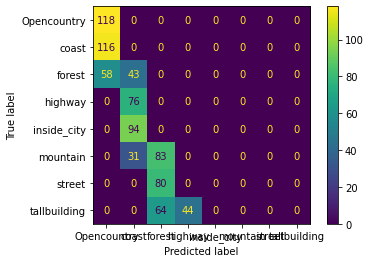

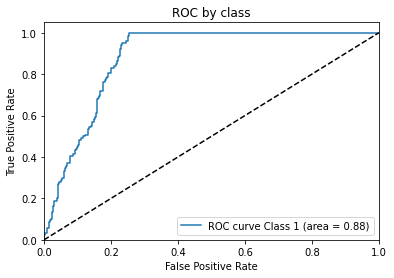

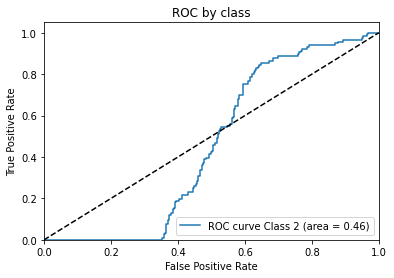

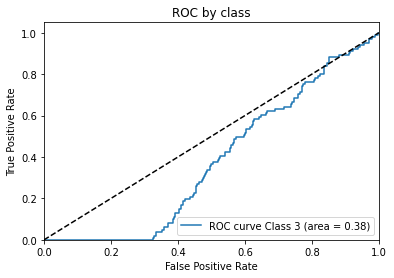

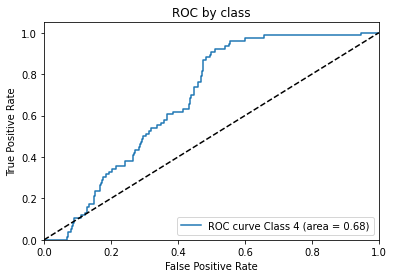

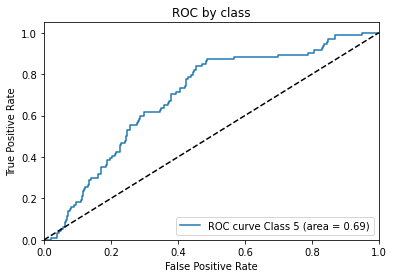

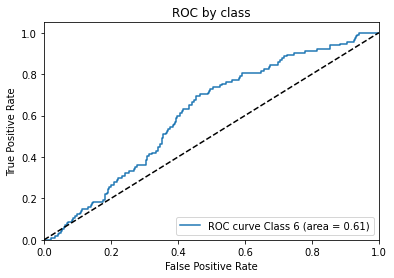

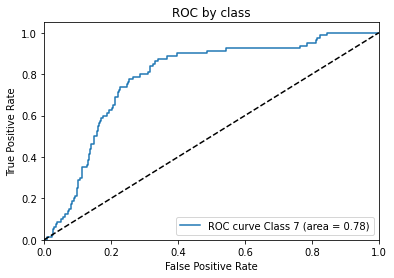

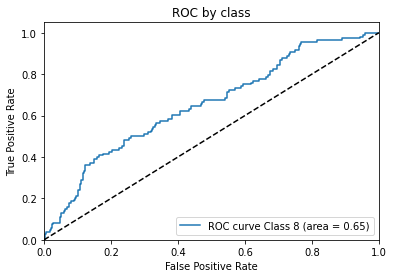

,param_C,param_degree,param_kernel,test_score
0,0.507162,7.0,<function histogramIntersection at 0x7f839ccbf...,14.622057


In [58]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

import matplotlib.pyplot as plt

test_results = pd.DataFrame().reindex(columns=["param_C", "param_degree", "param_kernel", "test_score"])

ts_labels_OneHot = np.array([[0,0,0,0,0,0,0,0]])

for sample in ts_labels:
  aux = [0 for _ in range(len(svc_test.classes_))]
  aux[np.where(svc_test.classes_ == sample)[0].item()] = 1
  ts_labels_OneHot = np.vstack((ts_labels_OneHot, aux))

ts_labels_OneHot = np.delete(ts_labels_OneHot, 0, 0)

for _, s in train_results[:1][["param_C", "param_degree", "param_kernel", "mean_test_score"]].T.iteritems():

    # classifier = OneVsRestClassifier(
    #     SVC(C=s["param_C"], degree=s["param_degree"], kernel=s["param_kernel"], probability=True, random_state=np.random.RandomState(0))
    # )
    classifier = SVC(C=s["param_C"], degree=s["param_degree"], kernel=s["param_kernel"], probability=True, random_state=np.random.RandomState(0))
    classifier.fit(visual_words, t_labels)
    
    y_score = classifier.decision_function(visual_words_test)
    y_pred = svc_test.predict(visual_words_test)
    cnf_matrix = confusion_matrix(ts_labels, y_pred, labels=svc_test.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=svc_test.classes_)
    disp.plot()

    test_acc = 100*classifier.score(visual_words_test, ts_labels)
    test_results = test_results.append({
        "param_C": s["param_C"],
        "param_degree": s["param_degree"],
        "param_kernel": s["param_kernel"],
        "test_score": test_acc,
    }, ignore_index=True)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classifier.classes_)):
        fpr[i], tpr[i], _ = roc_curve(ts_labels_OneHot[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    plt.figure()
    for i in range(len(classifier.classes_)):
        plt.plot(fpr[i], tpr[i], label='ROC curve Class %i (area = %0.2f)' % (i+1,roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC by class')
        plt.legend(loc="lower right")
    plt.show() 
test_results.to_csv("./test_results/test1_default_tolerance_fp.csv")
test_results

There is an issue with something we can't quite find with this test pass. Labels are most definitely wrong, but we can't quite see the origin of the issue.